# Chapter 6 - Other Popular Machine Learning Methods
## Segment 4 - Decision tree models with CART

### Decision Trees

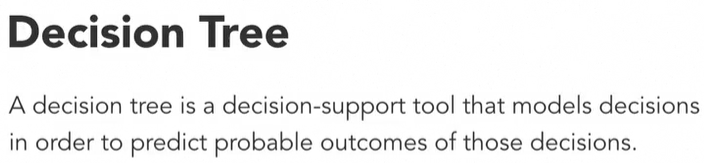

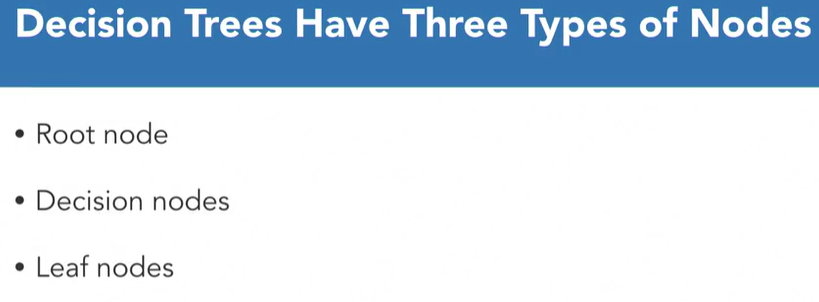

A root node is node that represents the entire population or sample, and this (mumbles) gets divided into two or more homogenous sets.

A decision node is where a subnode splits into further subnodes. And a leaf node is just the end node or the furthest subnode. 

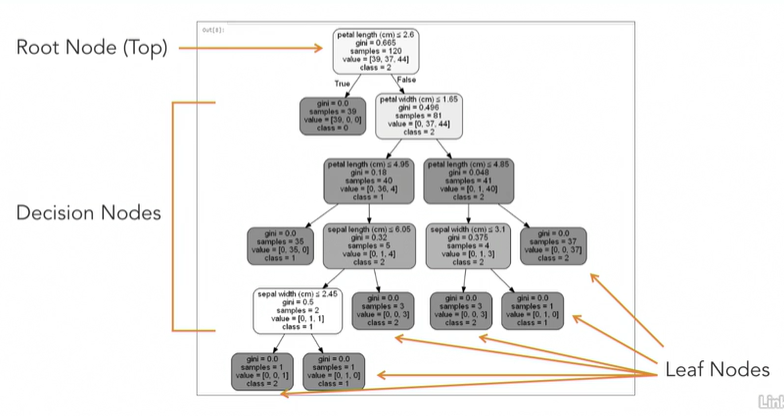

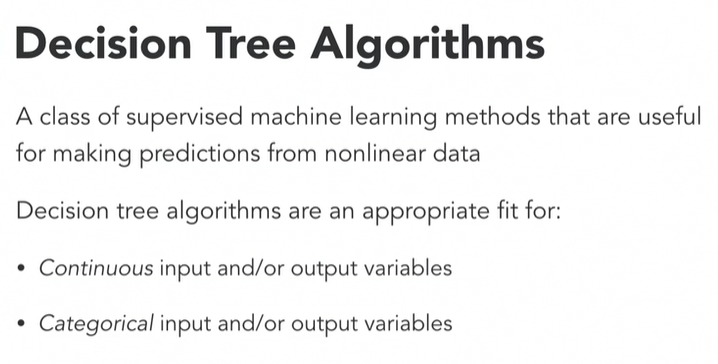

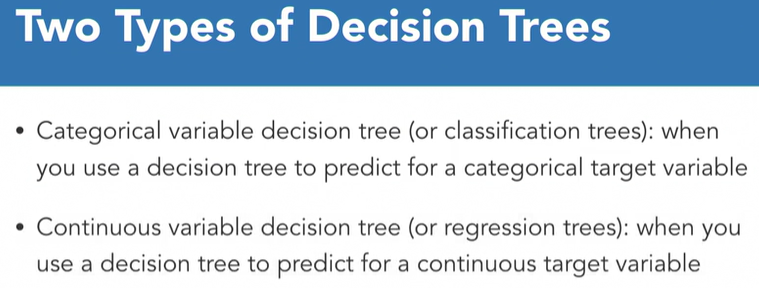

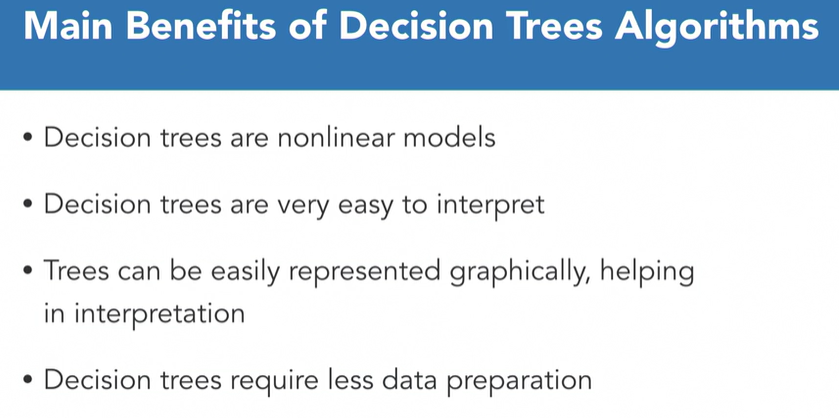

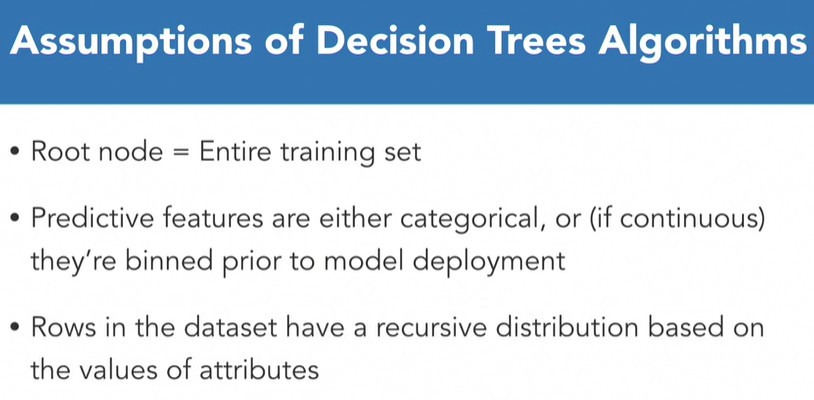

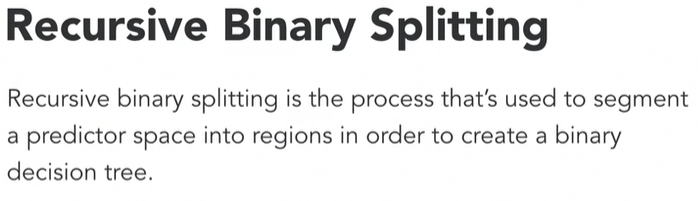

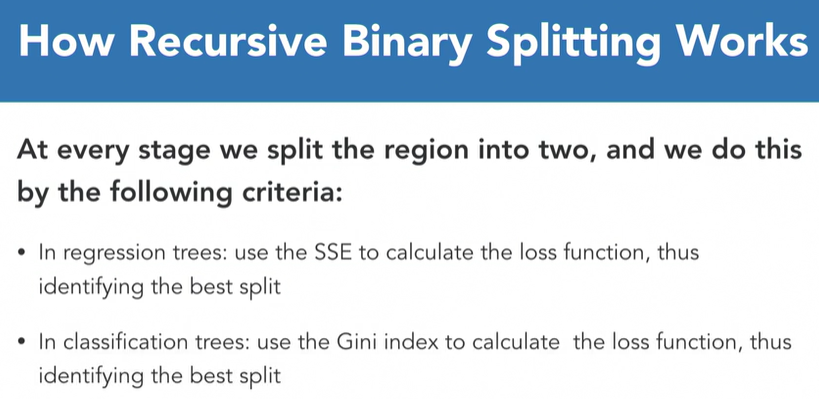

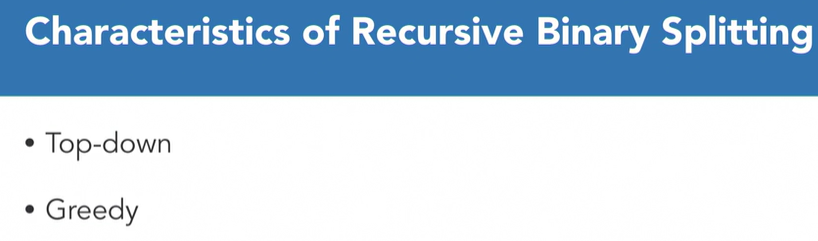

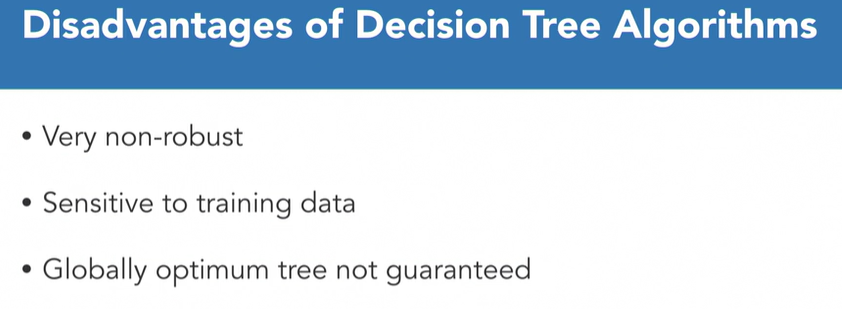

They can be very non-robust and sensitive to training data. What this means is that a small change in the training data can cause a large change in the final estimated tree. Since we use a a greedy approach while training the decision trees, it can't be guaranteed that the procedure would get us the globally optimal tree. One way to tackle this is to train multiple trees where the training data in the features are randomly sampled.

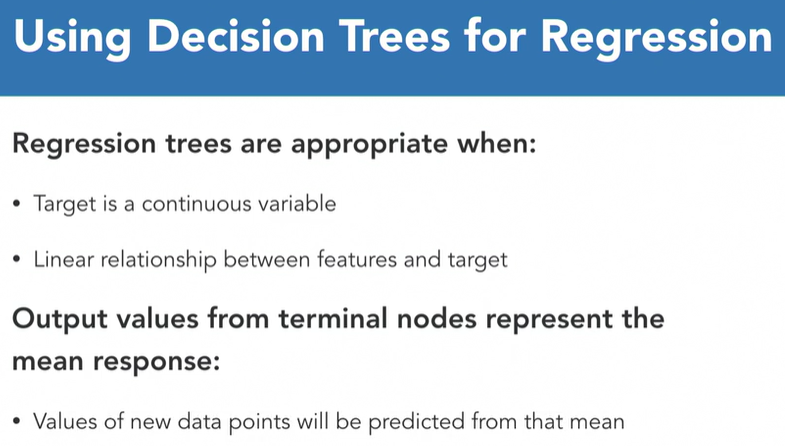

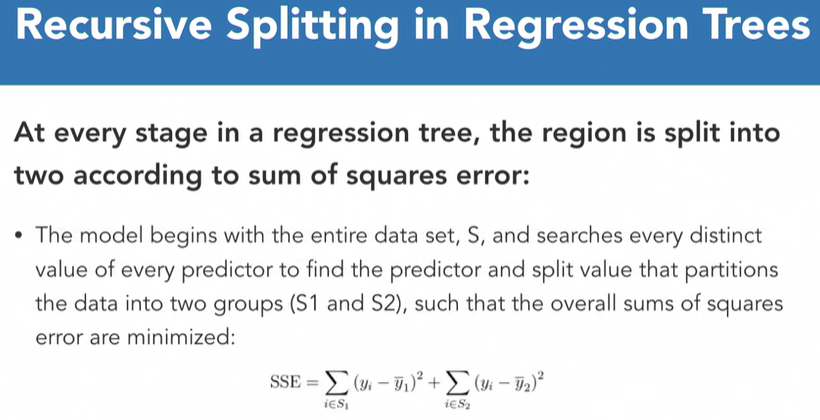

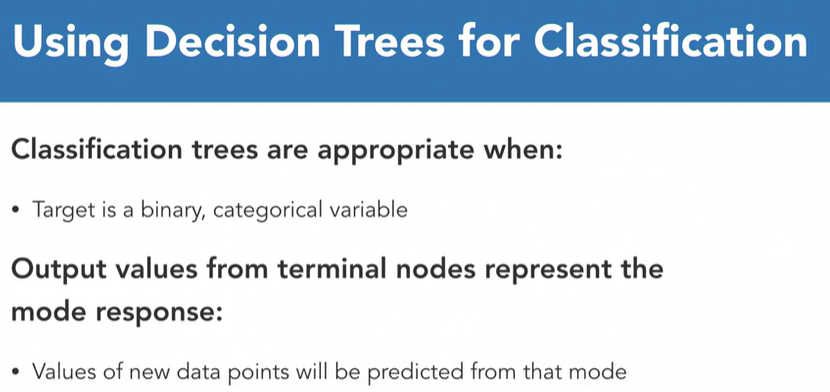

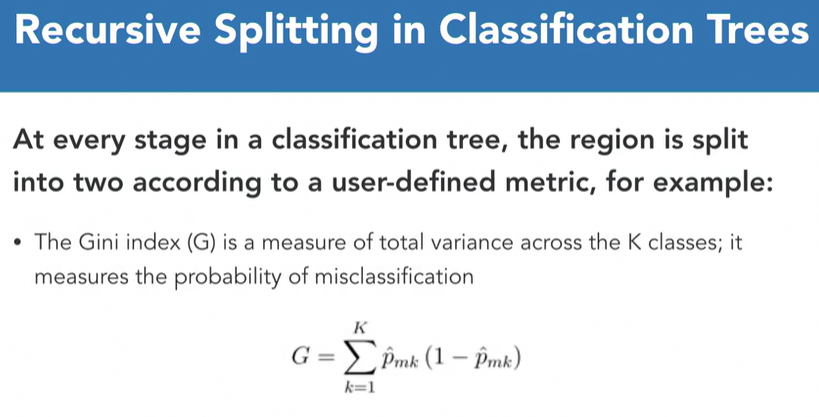

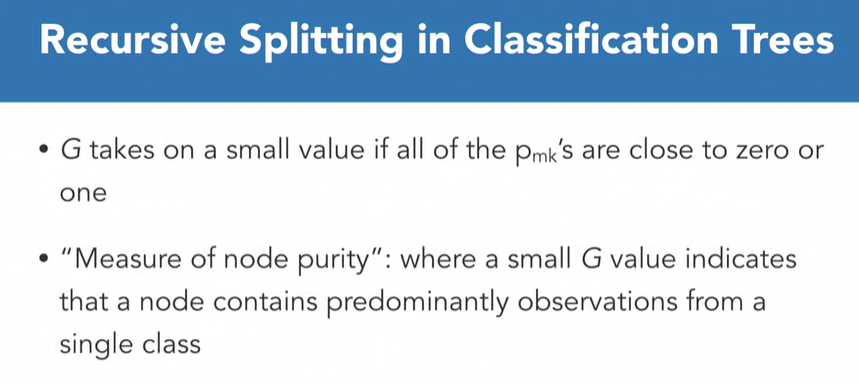

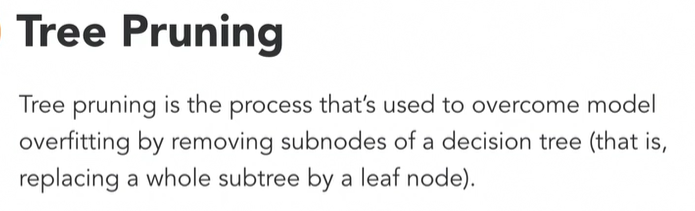

 replacing a whole subtree by a leaf node. Why you need to prune a decision tree? Well, if you grow a tree deep, it would make good predictions on the training data but will probably lead to bad performance on the test data. That's because of overfitting. In these cases, you need to prune the tree. The subtree in question is replaced by a leaf node if a decision rule establishes the expected error rate in the subtree is greater than the single leaf.

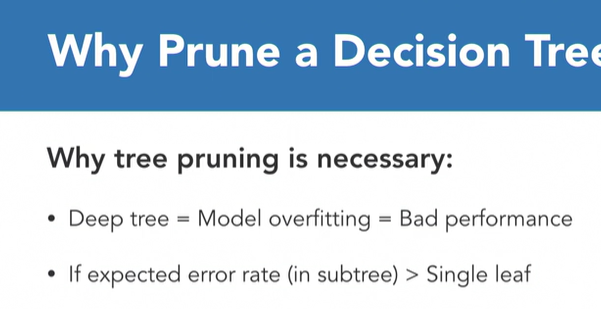

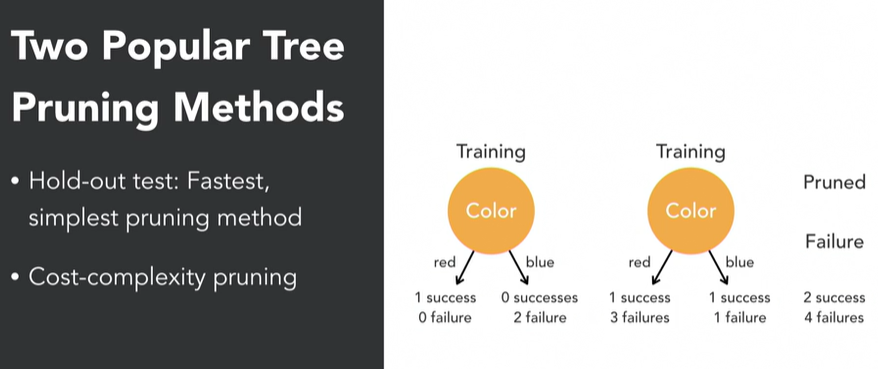

Hold-out test is the fastest and simplest pruning method. With this method, you work through each leaf node in the tree and evaluate the effect original removing it using a hold-out test set. A leaf node is removed only if removing it results in a drop in the overall cost function on the entire test set. You stop removing nodes when no further improvements can be made. 


Cost-complexity pruning is also called the weakest link pruning. This is wear a learning parameter, alpha, is used to weigh weather nodes can be removed based on the size of the subtree.

In [1]:
import os
os.environ["path"]

'C:\\Users\\Andre\\Anaconda3;C:\\Users\\Andre\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Andre\\Anaconda3\\Library\\usr\\bin;C:\\Users\\Andre\\Anaconda3\\Library\\bin;C:\\Users\\Andre\\Anaconda3\\Scripts;C:\\Users\\Andre\\MyPythonScripts\\;C:\\Python38\\Scripts\\;C:\\Python38\\;C:\\Program Files (x86)\\Intel\\iCLS Client\\;C:\\Program Files\\Intel\\iCLS Client\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\Common Files\\Intel\\WirelessCommon\\;C:\\Program Files (x86)\\Calibre2\\;C:\\Program Files (x86)\\Microsoft SQL Server\\150\\DTS\\Binn\\;C:\\

In [2]:
os.environ["path"]=os.environ["path"]+";C:\\Program Files (x86)\\Graphviz2.38\\bin"

In [3]:
os.environ["path"]

'C:\\Users\\Andre\\Anaconda3;C:\\Users\\Andre\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Andre\\Anaconda3\\Library\\usr\\bin;C:\\Users\\Andre\\Anaconda3\\Library\\bin;C:\\Users\\Andre\\Anaconda3\\Scripts;C:\\Users\\Andre\\MyPythonScripts\\;C:\\Python38\\Scripts\\;C:\\Python38\\;C:\\Program Files (x86)\\Intel\\iCLS Client\\;C:\\Program Files\\Intel\\iCLS Client\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\Common Files\\Intel\\WirelessCommon\\;C:\\Program Files (x86)\\Calibre2\\;C:\\Program Files (x86)\\Microsoft SQL Server\\150\\DTS\\Binn\\;C:\\

In [4]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn import metrics

### Preparing the data

In [5]:
iris=datasets.load_iris()

df = pd.DataFrame(iris.data, columns= iris.feature_names)

y = pd.DataFrame(iris.target)

y.columns = ['labels']

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
y.labels.value_counts()

2    50
1    50
0    50
Name: labels, dtype: int64

### The decision tree model

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(df, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
!pip install pydotplus

In [9]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


InvocationException: GraphViz's executables not found